In [2]:
import csv
import pandas as pd
import numpy as np

file_name="/home/rusul/Desktop/Upload/global-temp-annual_csv.csv"

df1 = pd.read_csv(file_name)
#df1.dropna()
df1.head()
 
temp=df1[['Land', 'Land and Ocean', 'N Hem', 'S Hem']]   
temp.head()

,Land,Land and Ocean,N Hem,S Hem
0,-0.43,-0.21,-0.33,-0.09
1,-0.34,-0.13,-0.22,-0.03
2,-0.28,-0.16,-0.24,-0.07
3,-0.28,-0.19,-0.29,-0.08
4,-0.57,-0.27,-0.41,-0.12


In [3]:
from math import log2

In [5]:
def cross_entropy(p, q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [7]:
gt=np.array(temp['Land and Ocean'])
nh=np.array(temp['N Hem'])
sh=np.array(temp['S Hem'])

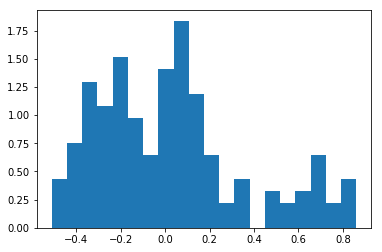

In [18]:
# Are the data normaly distributed? 

import matplotlib.pyplot as plt
import numpy as np

# Create the bins and histogram
count, bins, ignored = plt.hist(nh, 20, normed=True)
plt.show()

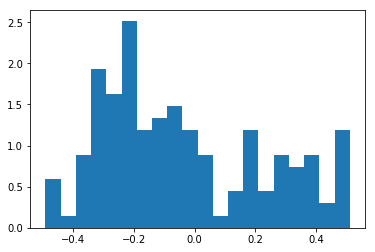

In [19]:
count, bins, ignored = plt.hist(sh, 20, normed=True)
plt.show()

In [22]:
# Convert data to probabilities

def probability(data):
    return 1/(np.std(data) * np.sqrt(2 * np.pi)) * np.exp( - (bins - np.mean(data))**2 / (2 * np.std(data)**2)) 

In [23]:
probability(nh)

array([0.369692  , 0.45755479, 0.55414111, 0.65670732, 0.76154849,
       0.86416663, 0.9595589 , 1.04260549, 1.10851762, 1.15329235,
       1.17411447, 1.16964938, 1.14018459, 1.08759915, 1.01516532,
       0.92721171, 0.82869604, 0.72474602, 0.62022695, 0.5193853 ,
       0.42560125])

In [35]:
print(cross_entropy(probability(nh),probability(sh)))
print(cross_entropy(probability(sh),probability(nh)))

2.1290285892122154
2.317557937965714


In [29]:
cross_entropy(probability(sh),probability(sh))


-0.515161270213584

In [30]:
cross_entropy(probability(nh),probability(nh))

3.190072769978261

In [31]:
cross_entropy(probability(gt),probability(gt))

1.0530715318865869

In [33]:
print(cross_entropy(probability(gt),probability(nh)))
print(cross_entropy(probability(nh),probability(gt)))
print(cross_entropy(probability(gt),probability(sh)))
print(cross_entropy(probability(sh),probability(gt)))

2.6554272221638624
2.056764361570928
0.6838720841851925
0.31264798202481564
